In [126]:
%pylab inline
rcParams['font.size']=18

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
import sys

In [4]:
sys.path.append('C:/Users/gjones/correlated_noise')

In [136]:
import fake_data
reload(fake_data)

<module 'fake_data' from 'C:/Users/gjones/correlated_noise\fake_data.py'>

In [137]:
fd = fake_data.FakeKIDData(red_exponent=-0.5,red_amplitude=5e-16,amplifier_amplitude_scale=5e-19)

C:/Users/gjones/correlated_noise\fake_data.py:25: RuntimeWarning: divide by zero encountered in power
  red_fft = nfft*np.sqrt(120*self.red_amplitude*2/self.sampling_rate)*fft_freq**self.red_exponent * np.exp(np.pi*2j*np.random.rand(nfft))


In [104]:
pxx,fr = mlab.psd(fd.total_signal[:,0],NFFT=2**14,Fs=fd.sampling_rate)

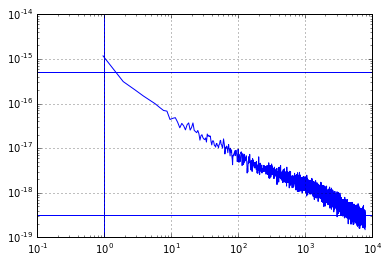

In [105]:
loglog(fr,pxx)
ax = gca()
ax.axhline(fd.red_amplitude)
ax.axhline(fd.shot_amplitudes[1])
ax.axhline(fd.amplifier_amplitudes[1])
ax.axvline(1)
grid()

In [106]:
fd.total_signal.shape

(524288L, 16L)

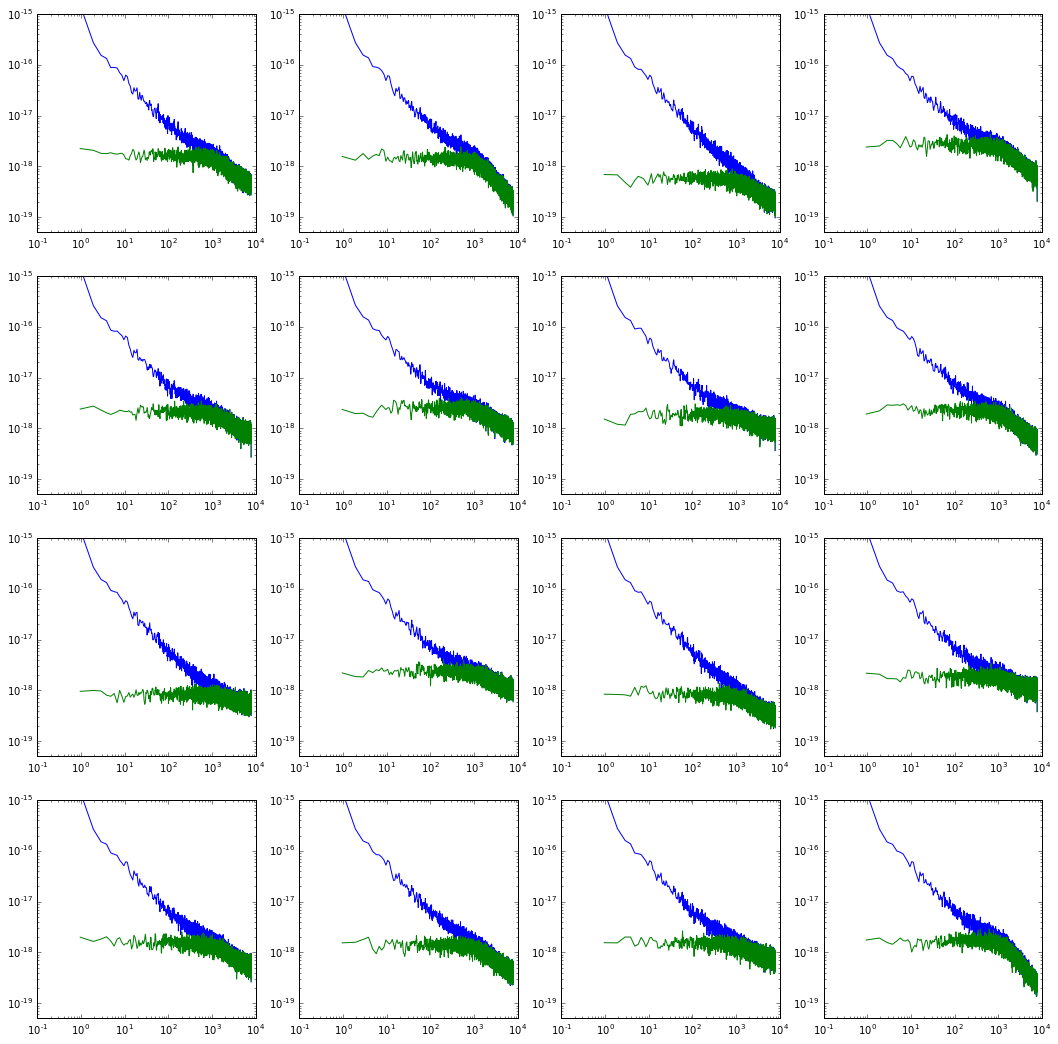

In [113]:
fig,axs = subplots(4,4,figsize=(18,18))
for k in range(16):
    ax = axs.flatten()[k]
    pxx,fr = mlab.psd(fd.total_signal[:,k],NFFT=2**14,Fs=fd.sampling_rate)
    ax.loglog(fr,pxx)
    pxx,fr = mlab.psd(fd.signal_without_red_noise[:,k],NFFT=2**14,Fs=fd.sampling_rate)
    ax.loglog(fr,pxx)
    
    ax.set_ylim(5e-20,1e-15)

In [114]:
np.random.seed?

In [138]:
import svd_model
reload(svd_model)

<module 'svd_model' from 'C:/Users/gjones/correlated_noise\svd_model.pyc'>

In [139]:
svd = svd_model.SVDNoiseModel(fd.total_signal,fd.sampling_rate)
svd.construct_model(nfft=2**16)

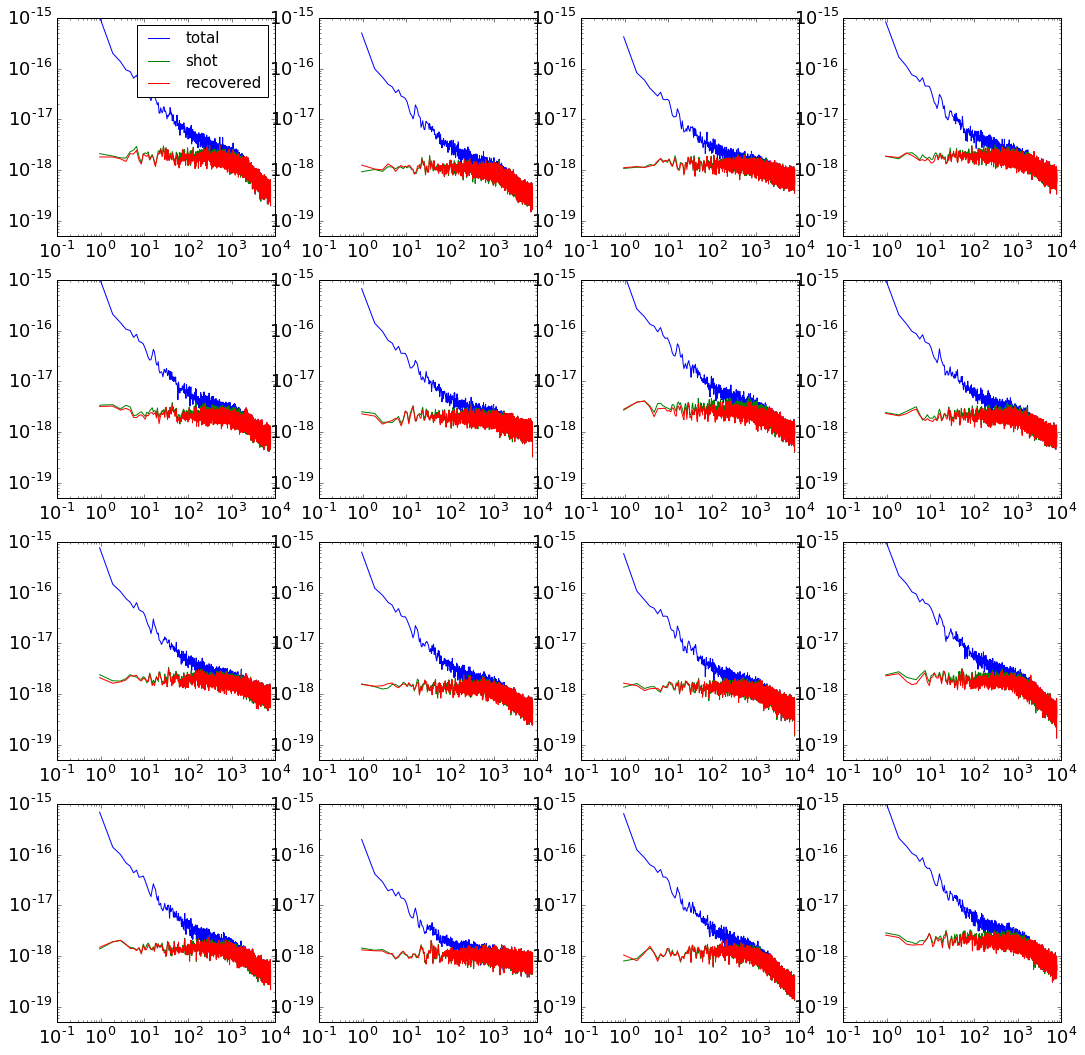

In [142]:
fig,axs = subplots(4,4,figsize=(18,18))
for k in range(16):
    ax = axs.flatten()[k]
    pxx,fr = mlab.psd(fd.total_signal[:,k],NFFT=2**14,Fs=fd.sampling_rate)
    ax.loglog(fr,pxx)
    pxx,fr = mlab.psd(fd.signal_without_red_noise[:,k],NFFT=2**14,Fs=fd.sampling_rate)
    ax.loglog(fr,pxx)
    pxx,fr = mlab.psd(svd.corrected_data[:,k],NFFT=2**14,Fs=fd.sampling_rate)
    ax.loglog(fr,pxx)
    ax.set_ylim(5e-20,1e-15)
axs[0,0].legend(['total','shot','recovered'],prop=dict(size='small'),loc='upper right')
savefig('2015-12-07-correlated-noise-fake-data-test-fine.pdf',bbox_inches='tight')

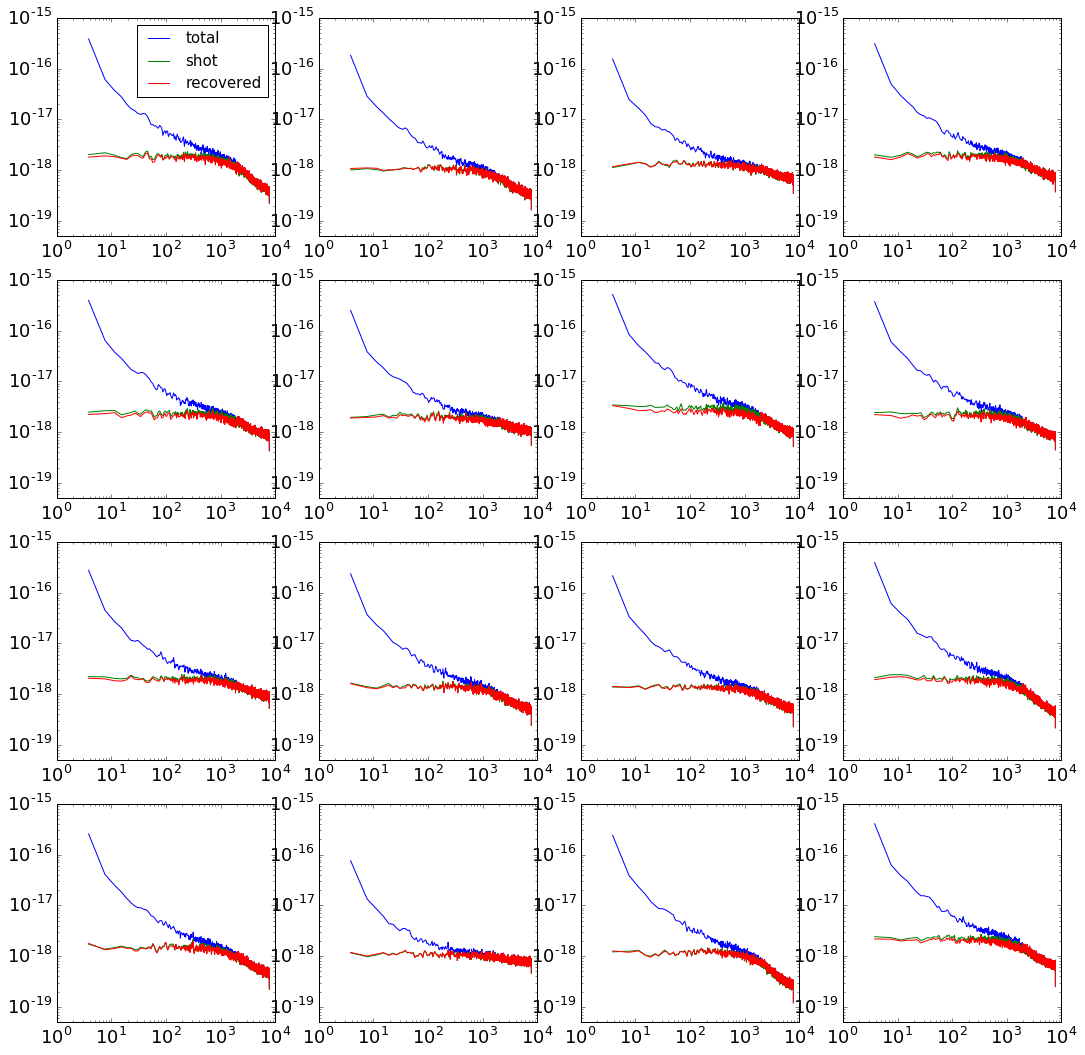

In [143]:
fig,axs = subplots(4,4,figsize=(18,18))
for k in range(16):
    ax = axs.flatten()[k]
    pxx,fr = mlab.psd(fd.total_signal[:,k],NFFT=2**12,Fs=fd.sampling_rate)
    ax.loglog(fr,pxx)
    pxx,fr = mlab.psd(fd.signal_without_red_noise[:,k],NFFT=2**12,Fs=fd.sampling_rate)
    ax.loglog(fr,pxx)
    pxx,fr = mlab.psd(svd.corrected_data[:,k],NFFT=2**12,Fs=fd.sampling_rate)
    ax.loglog(fr,pxx)
    ax.set_ylim(5e-20,1e-15)
axs[0,0].legend(['total','shot','recovered'],prop=dict(size='small'),loc='upper right')
savefig('2015-12-07-correlated-noise-fake-data-test-coarse.pdf',bbox_inches='tight')